In [1]:
import torch
from PIL import Image
import torchvision.transforms as transforms
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'using {device} for inference')

using cpu for inference


In [2]:
resneXt = torch.hub.load('NVIDIA/DeepLearni#  # ¤#3 fgrgghghghghghhghghjfhfjfjfjfghghhtgtgtgtgggggggt#  aasasasaaaaaaaaaaasadasdsadadadasfaafaafafda##3New NNnnjfNEWNnfgjgjgjgjgjg"# ,fkgkgkgkgmlmfdldmgmg fgjmfmfmgrekoperskngExamples:torchhub', 'nvidia_resneXt')
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_convnets_processing_utils')

resneXt.eval().to(device)

Downloading: "https://github.com/NVIDIA/DeepLearningExamples/zipball/torchhub" to C:\Users\MaxF�rsntr�m-AI23GBG/.cache\torch\hub\torchhub.zip
Downloading: "https://api.ngc.nvidia.com/v2/models/nvidia/resnext101_32x4d_pyt_amp/versions/20.06.0/files/nvidia_resnext101-32x4d_200821.pth.tar" to C:\Users\MaxF�rsntr�m-AI23GBG/.cache\torch\hub\checkpoints\nvidia_resnext101-32x4d_200821.pth.tar
100%|██████████| 169M/169M [00:11<00:00, 14.9MB/s] 
Using cache found in C:\Users\MaxF�rsntr�m-AI23GBG/.cache\torch\hub\NVIDIA_DeepLearningExamples_torchhub


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layers): Sequential(
    (0): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
    

In [3]:
uris = [
    'http://images.cocodataset.org/test-stuff2017/000000024309.jpg',
    'http://images.cocodataset.org/test-stuff2017/000000028117.jpg',
    'http://images.cocodataset.org/test-stuff2017/000000006149.jpg',
    'http://images.cocodataset.org/test-stuff2017/000000004954.jpg',
]

batch = torch.cat(
    [utils.prepare_input_from_uri(uri) for uri in uris]
).to(device)

In [4]:
with torch.no_grad():
    output = torch.nn.functional.softmax(resneXt(batch), dim=1)

results = utils.pick_n_best(predictions=output, n=5)

sample 0: [('laptop, laptop computer', '58.3%'), ('mouse, computer mouse', '9.0%'), ('desk', '4.9%'), ('notebook, notebook computer', '4.4%'), ('web site, website, internet site, site', '0.5%')]
sample 1: [('mashed potato', '35.0%'), ('broccoli', '17.6%'), ('plate', '9.5%'), ('printer', '0.9%'), ('meat loaf, meatloaf', '0.7%')]
sample 2: [('racket, racquet', '82.3%'), ('tennis ball', '5.0%'), ('ping-pong ball', '1.2%'), ('baseball', '0.1%'), ('volleyball', '0.1%')]
sample 3: [('kelpie', '15.4%'), ('schipperke', '8.4%'), ('miniature schnauzer', '8.2%'), ('malinois', '6.5%'), ('German shepherd, German shepherd dog, German police dog, alsatian', '4.7%')]


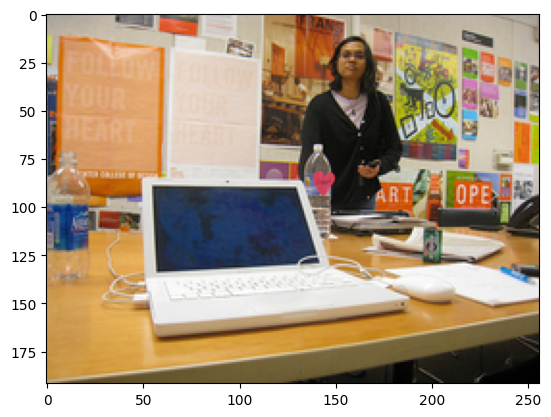

[('laptop, laptop computer', '58.3%'), ('mouse, computer mouse', '9.0%'), ('desk', '4.9%'), ('notebook, notebook computer', '4.4%'), ('web site, website, internet site, site', '0.5%')]


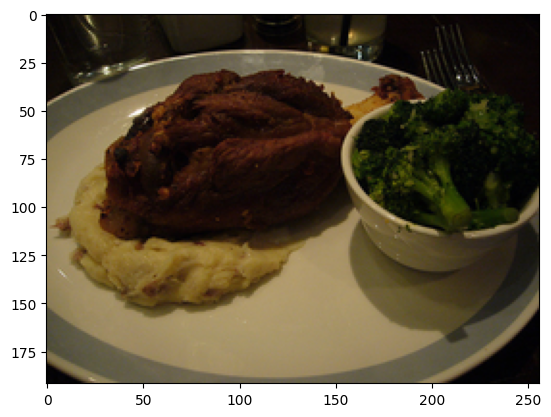

[('mashed potato', '35.0%'), ('broccoli', '17.6%'), ('plate', '9.5%'), ('printer', '0.9%'), ('meat loaf, meatloaf', '0.7%')]


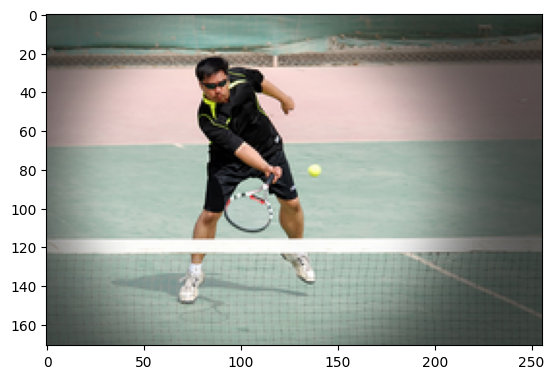

[('racket, racquet', '82.3%'), ('tennis ball', '5.0%'), ('ping-pong ball', '1.2%'), ('baseball', '0.1%'), ('volleyball', '0.1%')]


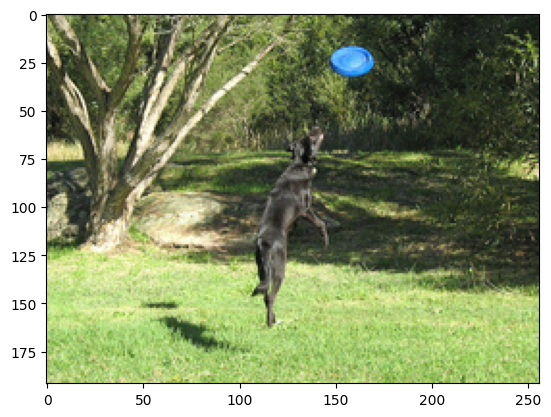

[('kelpie', '15.4%'), ('schipperke', '8.4%'), ('miniature schnauzer', '8.2%'), ('malinois', '6.5%'), ('German shepherd, German shepherd dog, German police dog, alsatian', '4.7%')]


In [6]:
for uri, result in zip(uris, results):
    img = Image.open(requests.get(uri, stream=True).raw)
    img.thumbnail((256, 256), Image.LANCZOS)
    plt.imshow(img)
    plt.show()
    print(result)